In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import HalfspaceIntersection
from scipy.spatial import ConvexHull
import itertools

## Duality in linear programming
The previous section contained a long-winded description of linear programming. To avoid doing that again this section will be a little shorter. 

A linear programming problem is defined:

$$
\begin{align*}
\text{maximise} \quad & c^Tx \\
\text{subject to} \quad & Ax\leq b \\
\text{} \quad & x\geq 0 \\
\end{align*}
$$


### Getting an upper bound on the objective function

Say I have a set of contstraints / inequalities. One of the things I can do is sum up the coefficients of those constraints for each variable (and the limit), and arrive at an entirely new equation. For instance, if $x_1 + x_2 < 2$ and $x_1 < 1$, then taking them both: $2x_1 + x_2 < 3$. At the same time, I can also multiply constraints by a positive constant ($x_1<2$ and $\frac{1}{2}x_1<1$ are the same). What this means is we can do a weighted sum of constraints and arrive at a new constraint.

If we denote these positive weights as $y$, then the new constraint coefficients are $A^Ty$, and the limit is $b^Ty$. This means:

$$
\begin{align*}
(A^Ty)^Tx &\leq b^Ty \\
y^TAx &\leq b^Ty \\
x^TA^Ty &\leq b^Ty \\
\end{align*}
$$

Notice that if we now introduce the constraint that $A^Ty\geq c$ we get:

$$x^Tc \leq b^Ty$$

So therefore $b^Ty$ is an upper bound on the problem, given the constraints that $y>0$ and $A^Ty\geq c$.

### The dual problem

This means we have an alternative linear programming problem, which instead of maximising the objective function, instead minimises this upper bound:

$$
\begin{align*}
\text{minimise} \quad & y^Tb \\
\text{subject to} \quad & A^Ty\geq c \\
\text{} \quad & y\geq 0 \\
\end{align*}
$$

The upper bound constraint is called weak duality. There is also a proof that the optimal value of the dual problem matches the value for the original (primal) problem and that you can convert between the two, but it's much more involved.

### Example

Consider this linear programming problem:

$$
\begin{align*}
\text{maximise} \quad & 2x_1 + x_2 \\
\text{subject to} \quad & x_1+x_2\leq 3 \\
\quad & x_1 \leq 2 \\
\quad & x_1,x_2\geq 0 \\
\end{align*}
$$

This looks like:

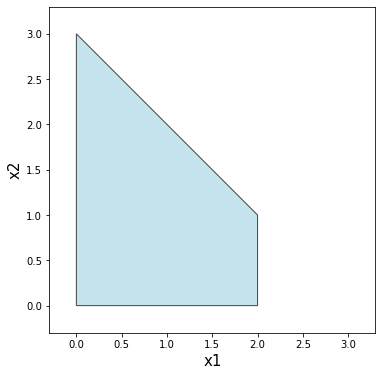

In [2]:
def make_2d_polyhedron_plot(vertices):
    plt.figure(figsize=(6,6))
    hull = ConvexHull(vertices)
    plt.fill(vertices[hull.vertices, 0], vertices[hull.vertices, 1], 'lightblue', edgecolor='black', alpha=0.7)
    min_axes = np.min(vertices)
    max_axes = np.max(vertices)
    plt.xlim(min_axes-(max_axes-min_axes)*0.1,max_axes+(max_axes-min_axes)*0.1)
    plt.ylim(min_axes-(max_axes-min_axes)*0.1,max_axes+(max_axes-min_axes)*0.1)
    plt.gca().set_aspect('equal')

vertices = np.array([[0,0],[2,0],[2,1],[0,3]])
make_2d_polyhedron_plot(vertices)
plt.xlabel("x1",fontsize=15)
plt.ylabel("x2",fontsize=15)
plt.show()

We can easily see that the optimal value is at $x=[2,1]$.

Now when we make the dual problem we have:

$$
\begin{align*}
\text{minimise} \quad & 3y_1 + 2y_2 \\
\text{subject to} \quad & y_1+y_2\geq 2 \\
\quad & y_1  \geq 1 \\
\quad & y_1,y_2\geq 0 \\
\end{align*}
$$

this is plotted below up (up to 3, as it goes to infinity technically).

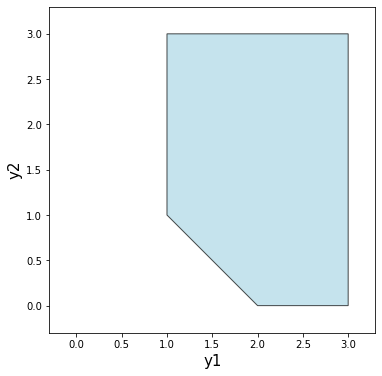

In [3]:
dual_vertices = np.array([[1,1],[2,0],[3,0],[3,3],[1,3]])
make_2d_polyhedron_plot(dual_vertices)
plt.xlabel("y1",fontsize=15)
plt.ylabel("y2",fontsize=15)
plt.show()

We can see the solution will be $y = [1,1]$. The corresponding 'new' inequality is then: $2x_1+x_2\leq 5$, which we can plot as a line on the original diagram:

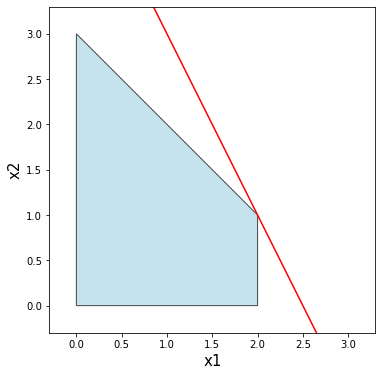

In [4]:
make_2d_polyhedron_plot(vertices)
x1 = np.linspace(0,3,100)
plt.plot(x1,5-2*x1,color="red")
plt.xlabel("x1",fontsize=15)
plt.ylabel("x2",fontsize=15)
plt.show()

And we can see it intersects the optimum exactly. There is also a nice proof that the dual of the dual is again the primal problem, so we can apply the same logic and get the 'new' inequality for the dual from the primal, which is $3y_1+2y_2\geq5$:

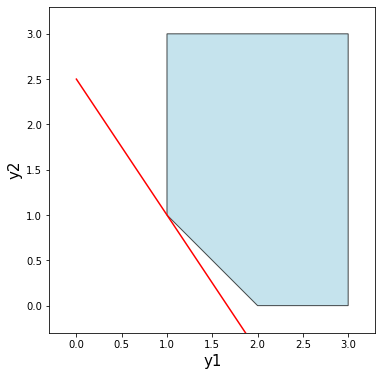

In [5]:
make_2d_polyhedron_plot(dual_vertices)
x1 = np.linspace(0,3,100)
plt.plot(x1,(5-3*x1)/2,color="red")
plt.xlabel("y1",fontsize=15)
plt.ylabel("y2",fontsize=15)
plt.show()

### Making some economic sense of this

In order to help understand the concept of the primal and dual linear programs it is useful to look them as solving economic problems. 

The primal linear program is about *resource allocation*. Value is produced as a linear function of the good produced, but the amount of those goods is then subject to resource constraints. We can think of each good as consuming an amount of each resource.

Consider our problem from before, and say it relates to some company producing chairs ($x_1$) and tables ($x_2$):

- In one day a person can make an entire chair or an entire table.
- The number of people operating at the company each day is 3.
- Chairs sell for twice as much as tables.
- The company only receives 2 chair cushions each day.

From this we get, as before:
$
A = \begin{bmatrix}
1 & 1 \\
1 & 0 \\
\end{bmatrix}
$
and 
$
b = \begin{bmatrix}
3 \\
2 \\
\end{bmatrix}
$. 
Each column in $A$ relates to a particular good produced, and each row in that column is then the amount of that resource (labour and cushoins) used when producing a single unit of the good.

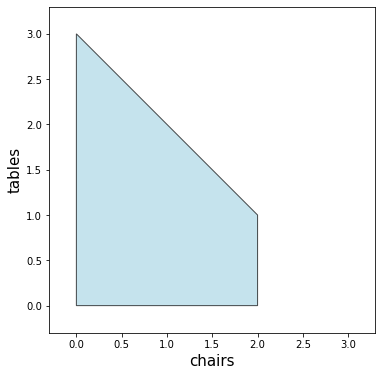

In [6]:
make_2d_polyhedron_plot(vertices)
plt.xlabel("chairs",fontsize=15)
plt.ylabel("tables",fontsize=15)
plt.show()

Imagine I come along and offer to buy some raw material with a price vector $y$ (an amount for a unit of each resource). Should this company accept?

We know that each column $A_i$ is the amount of each resource required to produce a corresponding value $c_i$. If the company produces 1 fewer units of good $i$ it then frees up $A_i$ of each resource, which it can then sell to me for $y$. The value they get from selling those resources is $A_iy$, but the value they get from using those them instead (to produce good $i$) is $c_i$. If the company is rational it will only accept my offer if it can make more by selling than by producing. As a result, we get $A^Ty\geq c$.

If this is the case then I can buy the entire raw material stock of this company.

If this is the case, and I am the one coming up with the price vector, it means I then want to minimize $b^Ty$.

This means we are essentially looking at the dual problem as *resource valuation*.

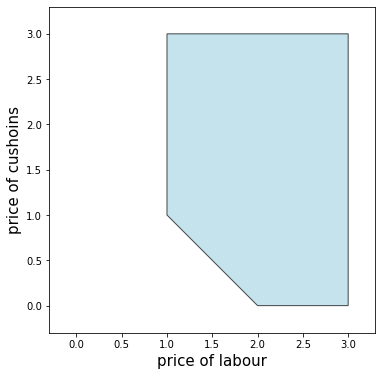

In [7]:
make_2d_polyhedron_plot(dual_vertices)
plt.xlabel("price of labour",fontsize=15)
plt.ylabel("price of cushoins",fontsize=15)
plt.show()

We can see that the price of labour is always greater than 1. This is because with labour the company can always just make a table instead. The price of a cushoin is more complicated. I could buy a cushoin for 0, but I would need to then buy the labour for 2 each. This is because with those 2 people the company could offset the loss of the cushoin by selling 2 tables. And I could buy the cushoin and labour for 1 each, as this is enough to make a chair for value 2. 